<a href="https://colab.research.google.com/github/Estrellas-857/IDS703NLP_Final_Project/blob/main/Discriminative_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/ids703nlp/IMDB Dataset_cleaned.csv', encoding='latin1')
data.head()

,Unnamed: 0,review,sentiment,review_cleaned
0,0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,1,A wonderful little production. <br /><br />The...,positive,wonderful little production. filming technique...
2,2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# When tokenizing new text, words that are not in the top VOCAB_SIZE
# most frequent words are treated as out-of-vocabulary (OOV) words.
VOCAB_SIZE = 10000

# Preprocess the data
# Tokenize the text
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(data['review_cleaned'])
word_index = tokenizer.word_index
list(word_index.items())[:10]

[('<OOV>', 1),
 ('not', 2),
 ('movie', 3),
 ('film', 4),
 ('one', 5),
 ('like', 6),
 ('would', 7),
 ('good', 8),
 ('time', 9),
 ('even', 10)]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

# Constants
MAX_LENGTH = 120

# Convert text to sequences and pad them
sequences = tokenizer.texts_to_sequences(data['review_cleaned'])
padded_sequences = pad_sequences(sequences, maxlen=MAX_LENGTH, truncating='post', padding='post')
padded_sequences[:5]

array([[   5, 1929,  932,   58, 2959,  281, 3079,  102,  494,  471, 2317,
          35,   22,   57, 3118, 2959, 5246,    1,   52,  442,  157,  102,
         529,   54, 1612,    2,   41, 7728, 2202,    1,   41, 2469, 5761,
        5564, 1338,  261,  442, 3690,  247,  245,  529,  229,  317, 2959,
           1,  248,    1, 6742, 2438,  916,    1, 2586, 1288,    1,  402,
        4564, 2333, 1064, 6843, 2783,    1,  273,    1,    1,    2,  187,
        4770, 2792,  402,  230,   33,    1, 7981,    1,    1, 4908, 7605,
        2322,    1,  213, 8911, 7153,    1, 8506,    1,   36,  120,  135,
          70,    7,   51,  171, 1196,   41,  560,   94,  158,  165,    7,
           2, 2881,  701,   84, 1176, 4056, 2397, 1096,  701, 1304,  701,
         747, 2959,    2,  821,   87,   22,  281,   45,  108, 3118],
       [ 277,   44,  239, 1252, 2848,    1,   65,    9, 2040, 1450,  295,
           1,  408,    1,  173, 1711,  323,  296,   59,  439,   14, 2140,
         365, 4033,    2,   86,    1, 2155,

In [ ]:
# Convert labels to binary
labels = np.array([1 if label == 'positive' else 0 for label in data['sentiment']])

# Splitting the dataset into training and testing sets
train_sequences, test_sequences, train_labels, test_labels = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

train_sequences.shape, train_labels.shape, test_sequences.shape, test_labels.shape

((40000, 120), (40000,), (10000, 120), (10000,))

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv1D, MaxPooling1D

model = Sequential([
    Embedding(VOCAB_SIZE, 100, input_length=MAX_LENGTH),
    Conv1D(filters=50, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=4),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 100)          1000000   
                                                                 
 conv1d_2 (Conv1D)           (None, 116, 50)           25050     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 29, 50)            0         
 g1D)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 64)                29440     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                      

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(train_sequences, train_labels, epochs=10, validation_data=(test_sequences, test_labels))

# Evaluate the model
loss, accuracy = model.evaluate(test_sequences, test_labels)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/10
1250/1250 [==============================] - 106s 83ms/step - loss: 0.3717 - accuracy: 0.8265 - val_loss: 0.2917 - val_accuracy: 0.8805
Epoch 2/10
1250/1250 [==============================] - 112s 89ms/step - loss: 0.2158 - accuracy: 0.9205 - val_loss: 0.3379 - val_accuracy: 0.8720
Epoch 3/10
1250/1250 [==============================] - 107s 86ms/step - loss: 0.1194 - accuracy: 0.9596 - val_loss: 0.3739 - val_accuracy: 0.8716
Epoch 4/10
1250/1250 [==============================] - 107s 86ms/step - loss: 0.0569 - accuracy: 0.9833 - val_loss: 0.4606 - val_accuracy: 0.8638
Epoch 5/10
1250/1250 [==============================] - 93s 75ms/step - loss: 0.0354 - accuracy: 0.9895 - val_loss: 0.5998 - val_accuracy: 0.8539
Epoch 6/10
1250/1250 [==============================] - 93s 74ms/step - loss: 0.0260 - accuracy: 0.9923 - val_loss: 0.6180 - val_accuracy: 0.8620
Epoch 7/10
1250/1250 [==============================] - 92s 73ms/step - loss: 0.0221 - accuracy: 0.9934 - val_loss: 0.64

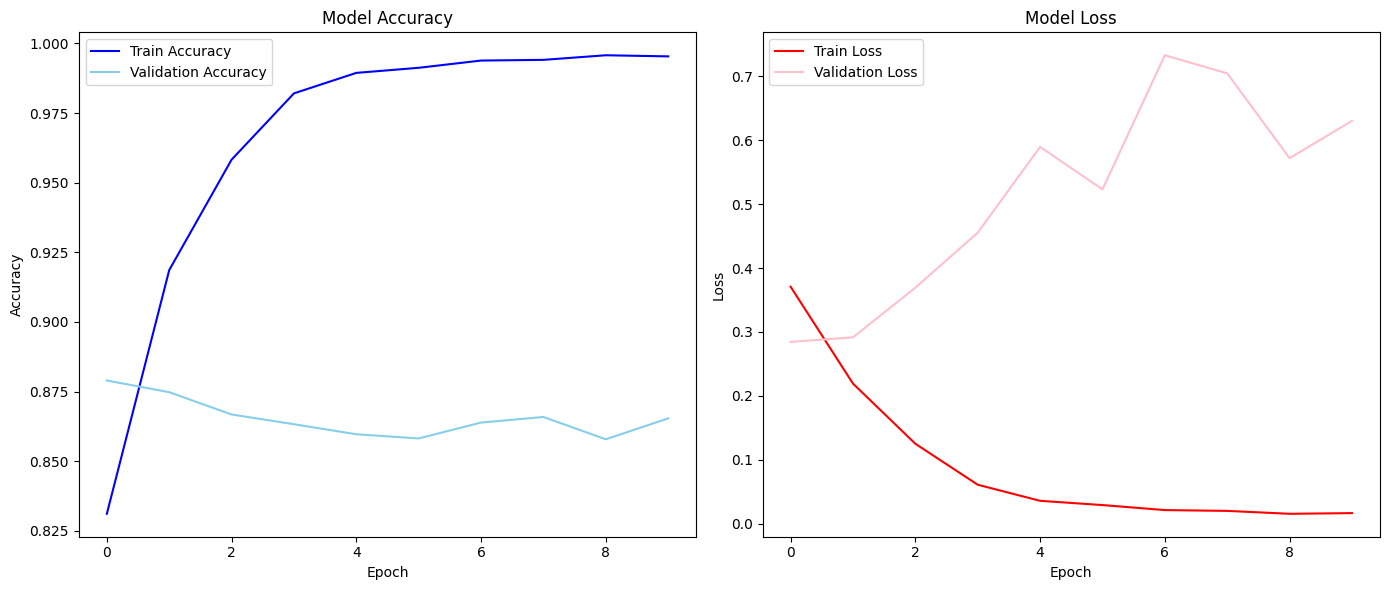

In [ ]:
import matplotlib.pyplot as plt
# Plotting both accuracy and loss on two separate subplots using Matplotlib

# Creating a subplot with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting accuracy on the first subplot
ax1.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='skyblue')
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend()

# Plotting loss on the second subplot
ax2.plot(history.history['loss'], label='Train Loss', color='red')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='pink')
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend()

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ids703nlp/real-data-Evaluated.png')
plt.show()


# Evaluation of Neural Network Model on Synthetic Data

In [ ]:
synthetic_data = pd.read_csv('/content/drive/MyDrive/ids703nlp/synthetic_data.csv')
synthetic_data.head()

,Unnamed: 0,review_cleaned,sentiment
0,0,unsanitary conditions. movie brilliant. riot j...,positive
1,1,dud. long dvd neither approach prejudices amer...,positive
2,2,gone!,positive
3,3,beliveable.,positive
4,4,me.who said fox day dad renowned swiss german ...,positive


In [ ]:
tokenizer_syn = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")

# Convert all elements in the 'review_cleaned' column to strings
synthetic_data['review_cleaned'] = synthetic_data['review_cleaned'].astype(str)

tokenizer_syn.fit_on_texts(synthetic_data['review_cleaned'])

# Convert text to sequences and pad them
sequences_syn = tokenizer_syn.texts_to_sequences(synthetic_data['review_cleaned'])
padded_sequences_syn = pad_sequences(sequences_syn, maxlen=MAX_LENGTH, truncating='post', padding='post')

# Convert labels to binary
labels_syn = np.array([1 if label == 'positive' else 0 for label in synthetic_data['sentiment']])

# Splitting the dataset into training and testing sets
syn_train_sequences, syn_test_sequences, syn_train_labels, syn_test_labels = train_test_split(padded_sequences_syn, labels_syn, test_size=0.2, random_state=42)

model_syn = Sequential([
    Embedding(VOCAB_SIZE, 100, input_length=MAX_LENGTH),
    Conv1D(filters=50, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=4),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_syn.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history_syn = model_syn.fit(syn_train_sequences, syn_train_labels, epochs=10, validation_data=(syn_test_sequences, syn_test_labels))

# Evaluate the model
loss_syn, accuracy_syn = model.evaluate(syn_test_sequences, syn_test_labels)
print(f'Loss: {loss_syn}, Accuracy: {accuracy_syn}')

Epoch 1/10
1250/1250 [==============================] - 95s 74ms/step - loss: 0.4674 - accuracy: 0.7539 - val_loss: 0.3773 - val_accuracy: 0.8351
Epoch 2/10
1250/1250 [==============================] - 91s 73ms/step - loss: 0.2712 - accuracy: 0.8846 - val_loss: 0.3557 - val_accuracy: 0.8427
Epoch 3/10
1250/1250 [==============================] - 91s 73ms/step - loss: 0.1497 - accuracy: 0.9374 - val_loss: 0.4408 - val_accuracy: 0.8370
Epoch 4/10
1250/1250 [==============================] - 92s 74ms/step - loss: 0.0827 - accuracy: 0.9643 - val_loss: 0.5919 - val_accuracy: 0.8315
Epoch 5/10
1250/1250 [==============================] - 91s 73ms/step - loss: 0.0562 - accuracy: 0.9746 - val_loss: 0.6481 - val_accuracy: 0.8280
Epoch 6/10
1250/1250 [==============================] - 92s 73ms/step - loss: 0.0443 - accuracy: 0.9786 - val_loss: 0.6303 - val_accuracy: 0.8271
Epoch 7/10
1250/1250 [==============================] - 91s 73ms/step - loss: 0.0388 - accuracy: 0.9818 - val_loss: 0.6961 -

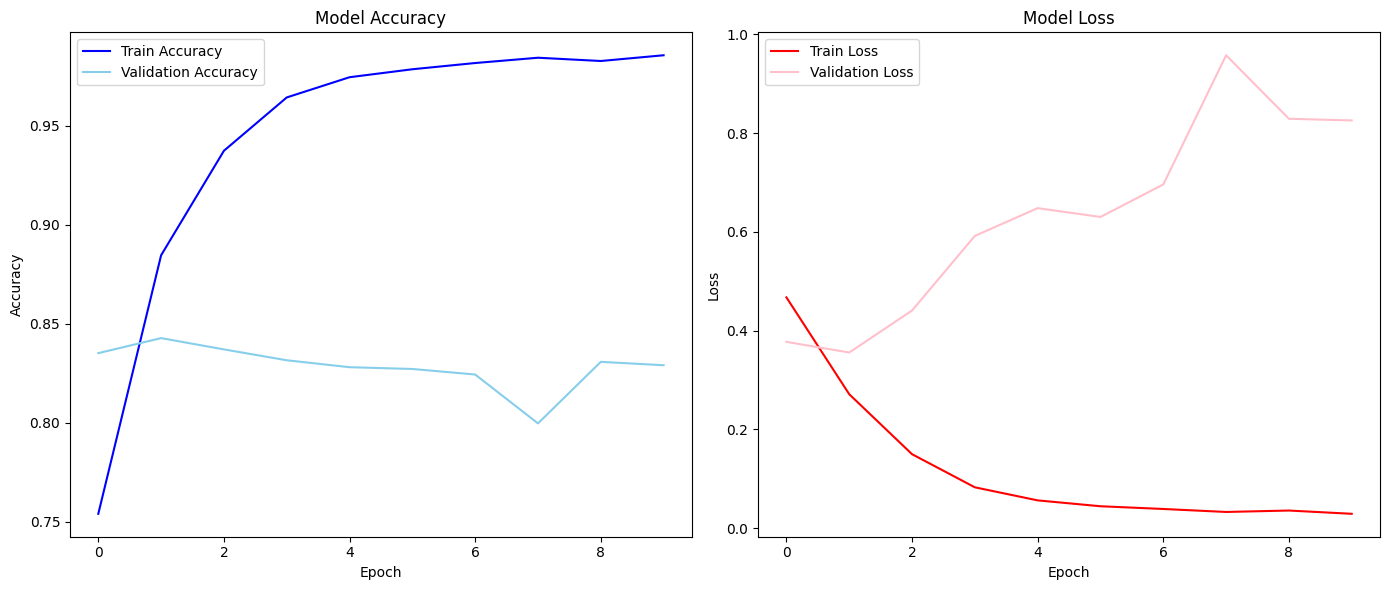

In [ ]:
import matplotlib.pyplot as plt
# Plotting both accuracy and loss on two separate subplots using Matplotlib

# Creating a subplot with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting accuracy on the first subplot
ax1.plot(history_syn.history['accuracy'], label='Train Accuracy', color='blue')
ax1.plot(history_syn.history['val_accuracy'], label='Validation Accuracy', color='skyblue')
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend()

# Plotting loss on the second subplot
ax2.plot(history_syn.history['loss'], label='Train Loss', color='red')
ax2.plot(history_syn.history['val_loss'], label='Validation Loss', color='pink')
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend()

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ids703nlp/synthetic-data-Evaluated.png')
plt.show()